In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
f_data = pd.read_csv("C:/Users/RAAVAN/Downloads/Python/forest_fires.csv")

Attribute Information:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).


The forest Fire Weather Index (FWI) is the Canadian system for rating ﬁre dangerand it includes six components ---
1. Fine Fuel Moisture Code (FFMC),
2. Duff Moisture Code (DMC), 
3. Drought Code (DC), 
4. Initial Spread Index (ISI), 
5. BuildupIndex (BUI) and 
6. FWI. 

The ﬁrst three are related to fuel codes: 
the FFMC denotes the moisture content surface litter and inﬂuences ignition and ﬁre spread, 
while the DMC and DC represent the moisture content of shallow and deep organic layers, which affect ﬁre intensity. 
The ISI is a score that correlates with ﬁre velocity spread, 
while BUI represents the amount of available fuel. 

The FWI index is an indicator of ﬁre intensityand it combines the two previous components. Although different scales are used for each of the FWI elements, high values suggest more severe burning conditions. 
Also,the fuel moisture codes require a memory (time lag) of past weather conditions: 16hours for FFMC, 12 days for DMC and 52 days for DC.

https://www.researchgate.net/publication/238767143_A_Data_Mining_Approach_to_Predict_Forest_Fires_using_Meteorological_Data


In [34]:
#Data type, no. of rows & column
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [35]:
f_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [36]:
#total null value
f_data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [37]:
#Basic statistics
f_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In area column min value is 0. This may represent no fire occur in the forest.

In [38]:
#getting general insight for categorical data
f_data[f_data.dtypes[f_data.dtypes=='object'].index].describe()

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


<AxesSubplot:>

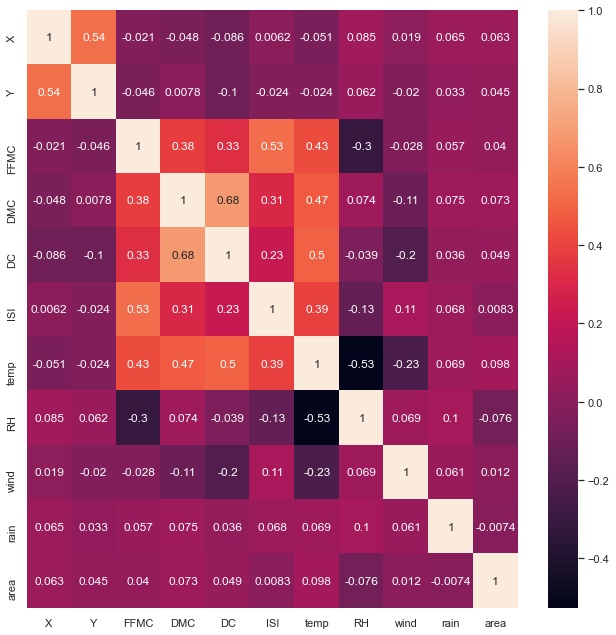

In [39]:
#correlation plot
plt.figure(figsize=(11, 11))
sns.heatmap(f_data.corr(), annot = True)

FFMC, DC, DMC, ISI has positive correlation with temperature. That mean, when Temperature increases it increases the FWI index and high values suggest more severe burning conditions.
RH has negative correlation with temp and negative correlation with FFMC.
Wind is negatively correlated with temp.
Wind is negatively correlated with DC, DMC.

In [40]:
#avg temp. group by month
divo=f_data.groupby([ 'month']).agg({'temp':np.average}).reset_index()
divo

,month,temp
0,apr,12.044444
1,aug,21.631522
2,dec,4.522222
3,feb,9.635000
4,jan,5.250000
5,jul,22.109375
6,jun,20.494118
7,mar,13.083333
8,may,14.650000
9,nov,11.800000


<AxesSubplot:xlabel='month', ylabel='temp'>

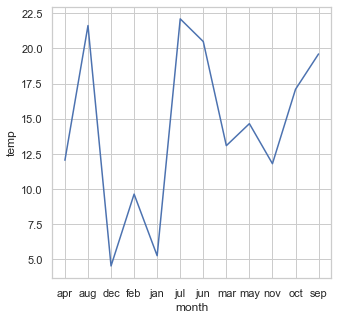

In [41]:
#AVg. Temp in monthwise
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.lineplot(x="month", y="temp", data=divo)

In [42]:
#avg wind speed group by month
wivo=f_data.groupby([ 'month']).agg({'wind':np.average}).reset_index()
wivo

,month,wind
0,apr,4.666667
1,aug,4.086413
2,dec,7.644444
3,feb,3.755000
4,jan,2.000000
5,jul,3.734375
6,jun,4.135294
7,mar,4.968519
8,may,4.450000
9,nov,4.500000


<AxesSubplot:xlabel='month', ylabel='wind'>

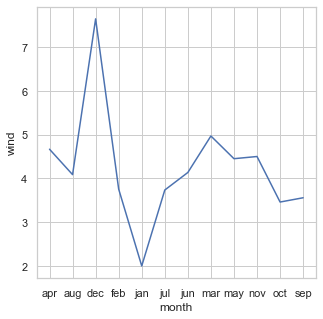

In [43]:
#AVg. Temp in monthwise
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.lineplot(x="month", y="wind", data=wivo)

In december avg. temp is low and avg. windspeed is higher.
In july, august month avg. temp is high.

In [44]:
#Total area burned group by month
aivo=f_data.groupby([ 'month']).agg({'area':np.sum}).reset_index()
aivo

,month,area
0,apr,80.02
1,aug,2297.99
2,dec,119.97
3,feb,125.50
4,jan,0.00
5,jul,459.83
6,jun,99.30
7,mar,235.26
8,may,38.48
9,nov,0.00


<AxesSubplot:xlabel='month', ylabel='area'>

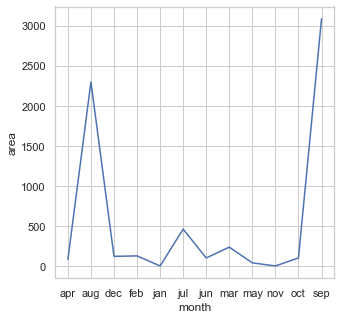

In [45]:
#Total Area burned in monthwise
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.lineplot(x="month", y="area", data=aivo)

In [72]:
#Total area burned group by month
wwivo=f_data.groupby([ 'day']).agg({'area':np.sum}).reset_index()
wwivo

,day,area
0,fri,447.24
1,mon,706.53
2,sat,2144.86
3,sun,959.93
4,thu,997.10
5,tue,807.79
6,wed,578.60


<AxesSubplot:xlabel='day', ylabel='area'>

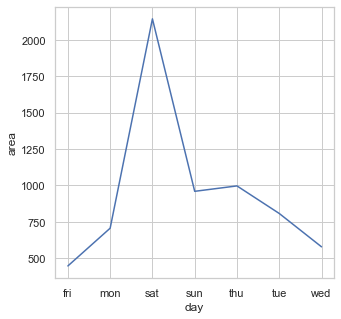

In [73]:
#Total Area burned in monthwise
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.lineplot(x="day", y="area", data=wwivo)

In september and august total amount area burned more
In saturday burned area is more.

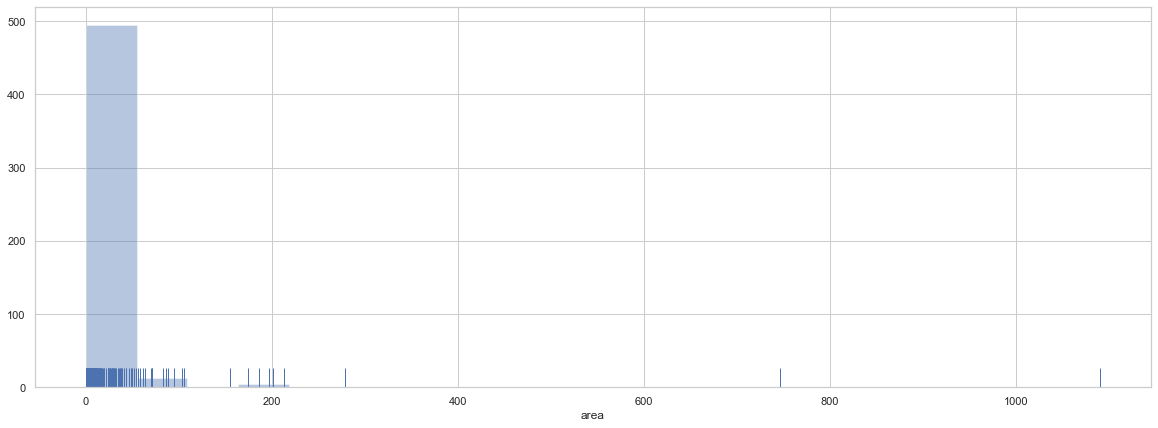

In [71]:
#Histogram
sns.set(style="whitegrid")
plt.figure(figsize=(20, 7))

sns.distplot(f_data['area'], bins=20, kde=False, rug=True);

Area output fall between 0 and 200. and most of the less than 100

In [46]:
#avg rainfall monthwise group by month
rivo=f_data.groupby([ 'month']).agg({'rain':np.average}).reset_index()
rivo

,month,rain
0,apr,0.000000
1,aug,0.058696
2,dec,0.000000
3,feb,0.000000
4,jan,0.000000
5,jul,0.006250
6,jun,0.000000
7,mar,0.003704
8,may,0.000000
9,nov,0.000000


<AxesSubplot:xlabel='month', ylabel='rain'>

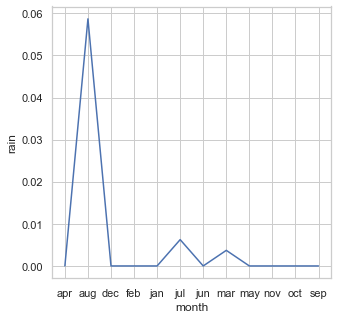

In [47]:
#AVg. Temp in monthwise
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.lineplot(x="month", y="rain", data=rivo)

This plot shows avg rainfall for august month is higher than other month.

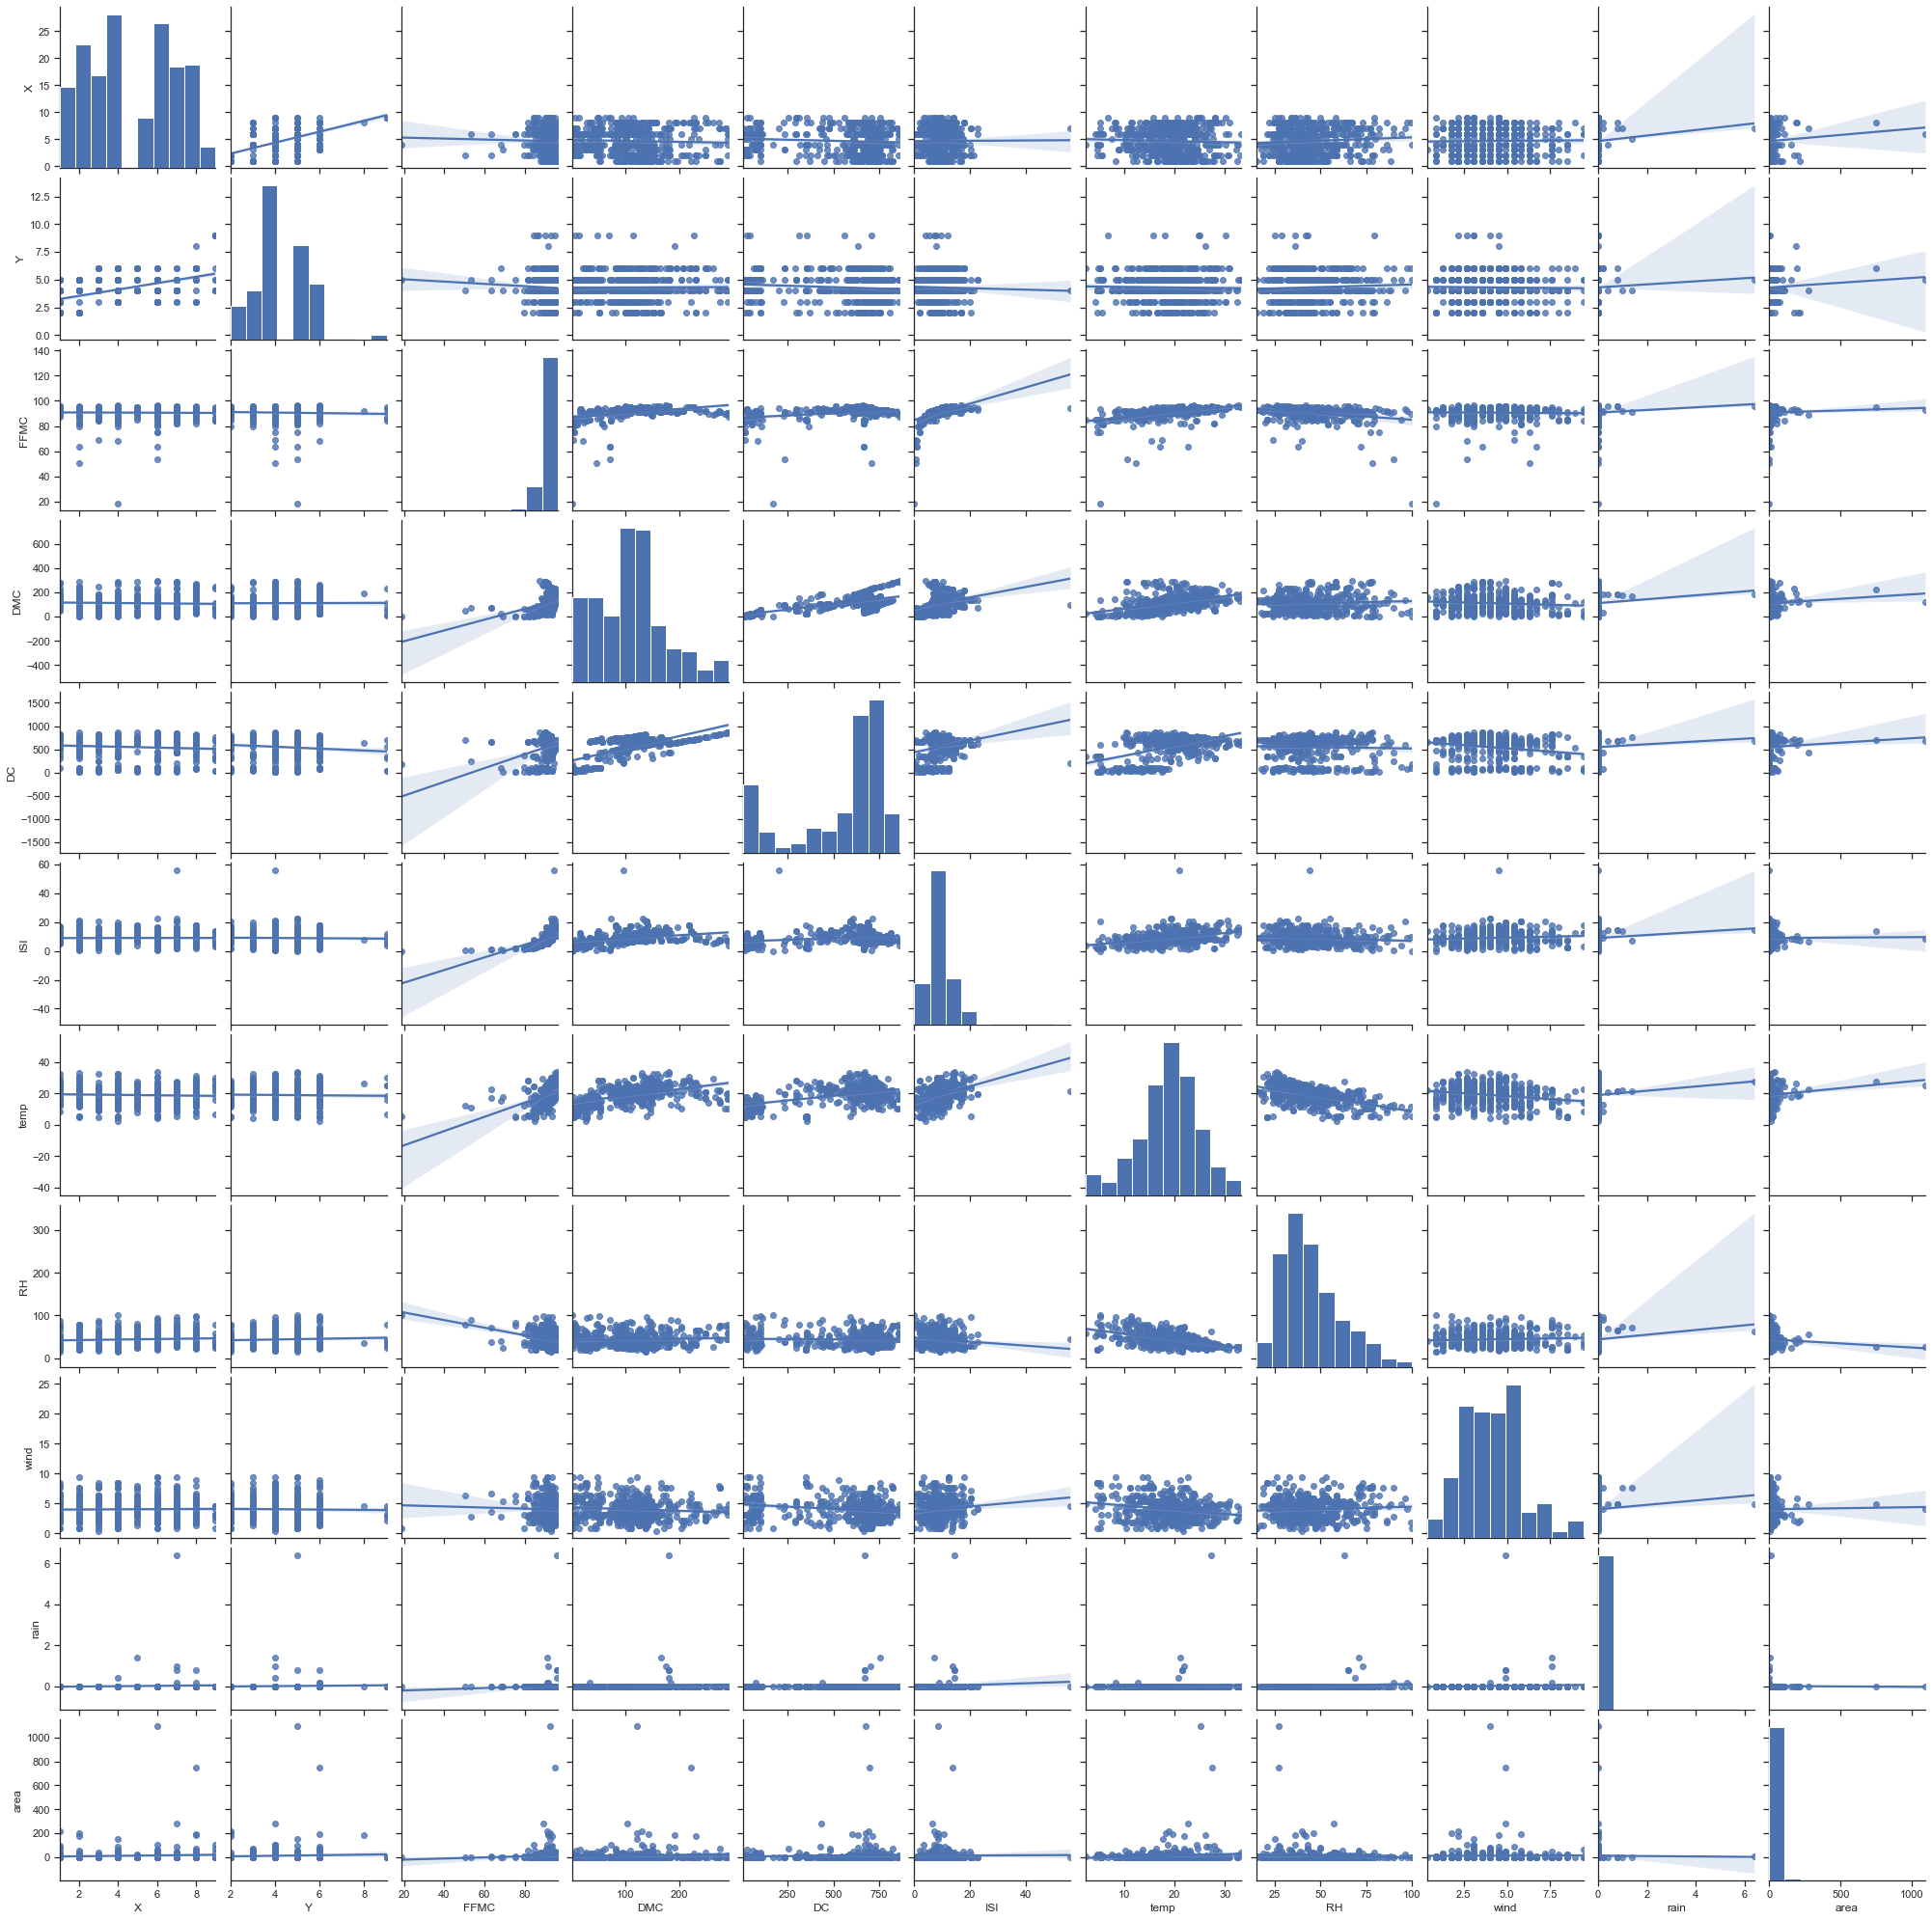

In [77]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(f_data, kind="reg", palette="husl")

<AxesSubplot:xlabel='temp'>

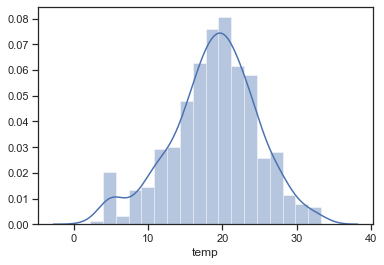

In [78]:
#Histogram plot
sns.distplot(f_data['temp'])

temp observation normally distributed

<AxesSubplot:>

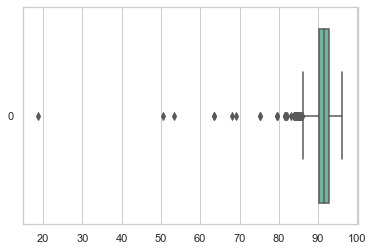

In [79]:
#Outliers Observation
sns.set(style="whitegrid")

sns.boxplot(data=f_data['FFMC'], 
            orient="h", palette="Set2")

<AxesSubplot:>

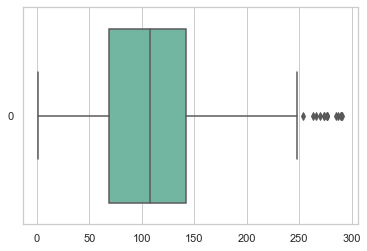

In [80]:
#Outliers Observation
sns.set(style="whitegrid")

sns.boxplot(data=f_data['DMC'], 
            orient="h", palette="Set2")

<AxesSubplot:>

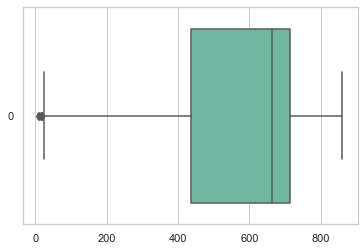

In [81]:
#Outliers Observation
sns.set(style="whitegrid")

sns.boxplot(data=f_data['DC'], 
            orient="h", palette="Set2")

<AxesSubplot:>

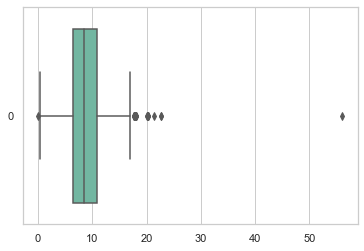

In [82]:
#Outliers Observation
sns.set(style="whitegrid")

sns.boxplot(data=f_data['ISI'], 
            orient="h", palette="Set2")

<AxesSubplot:>

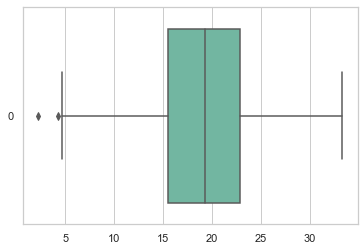

In [83]:
#Outliers Observation
sns.set(style="whitegrid")

sns.boxplot(data=f_data['temp'], 
            orient="h", palette="Set2")

<AxesSubplot:>

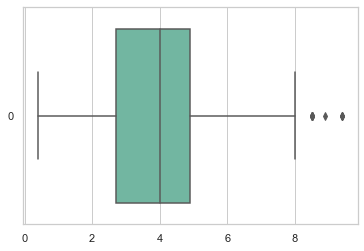

In [84]:
#Outliers Observation
sns.set(style="whitegrid")

sns.boxplot(data=f_data['wind'], 
            orient="h", palette="Set2")

<AxesSubplot:>

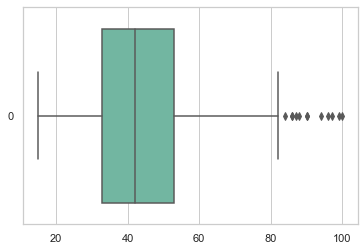

In [85]:
#Outliers Observation
sns.set(style="whitegrid")

sns.boxplot(data=f_data['RH'], 
            orient="h", palette="Set2")

In [90]:
#based on area value make a catagorical column 'damage_typ'e
def area_c(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low damage"
    elif area <= 25:
        return "moderate damage"
    elif area <= 100:
        return "high damage"
    else:
        return "severe damage"

f_data['damage_type'] = f_data['area'].apply(area_c)
f_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_type
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,No damage
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,No damage
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,No damage
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,No damage
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,No damage


<AxesSubplot:xlabel='month', ylabel='count'>

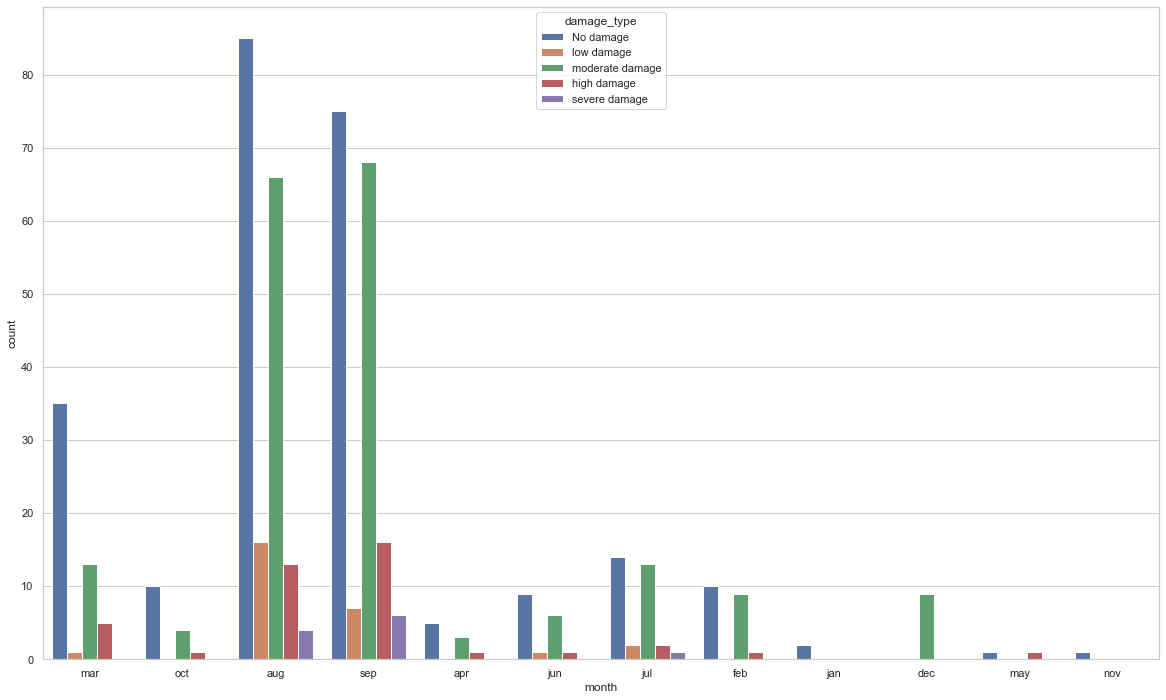

In [106]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

sns.countplot(x="month", hue="damage_type", data=f_data)

<AxesSubplot:xlabel='damage_type', ylabel='count'>

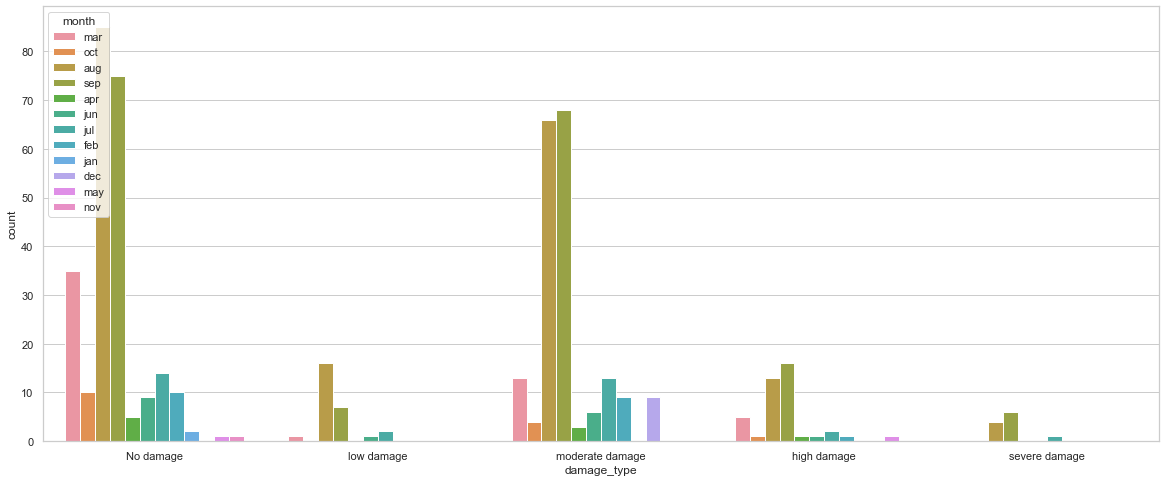

In [105]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))

sns.countplot(x="damage_type", hue="month", data=f_data)

In august, september high damage and severe damage occur

<AxesSubplot:xlabel='day', ylabel='count'>

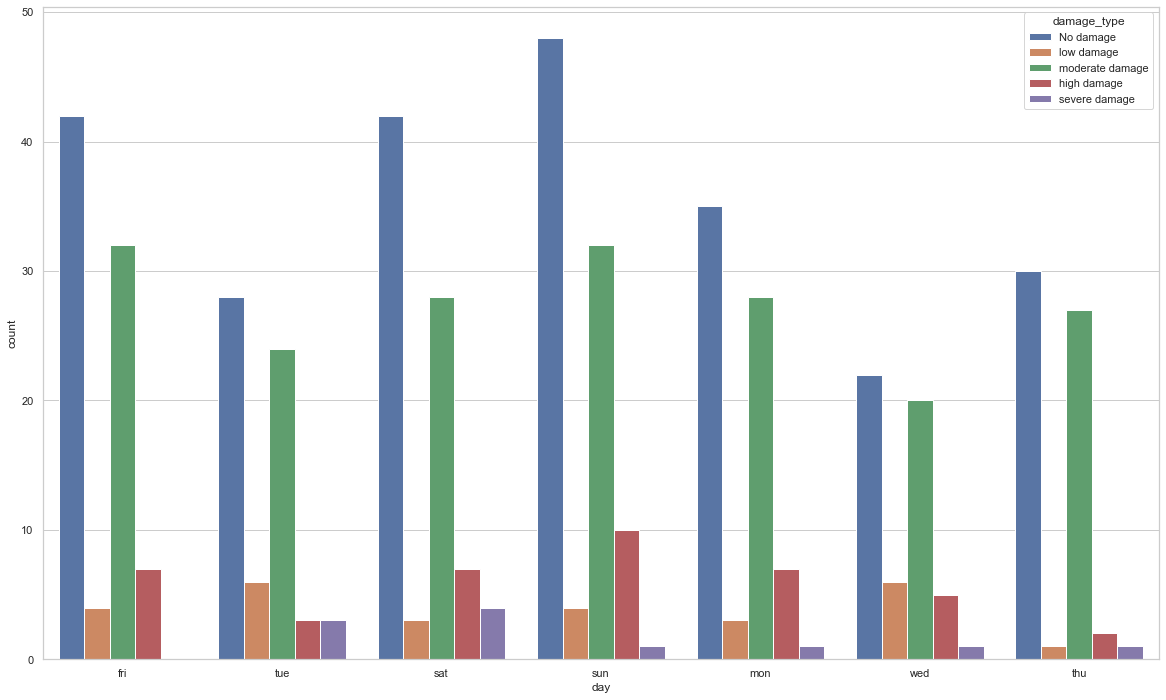

In [107]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

sns.countplot(x="day", hue="damage_type", data=f_data)

<AxesSubplot:xlabel='damage_type', ylabel='count'>

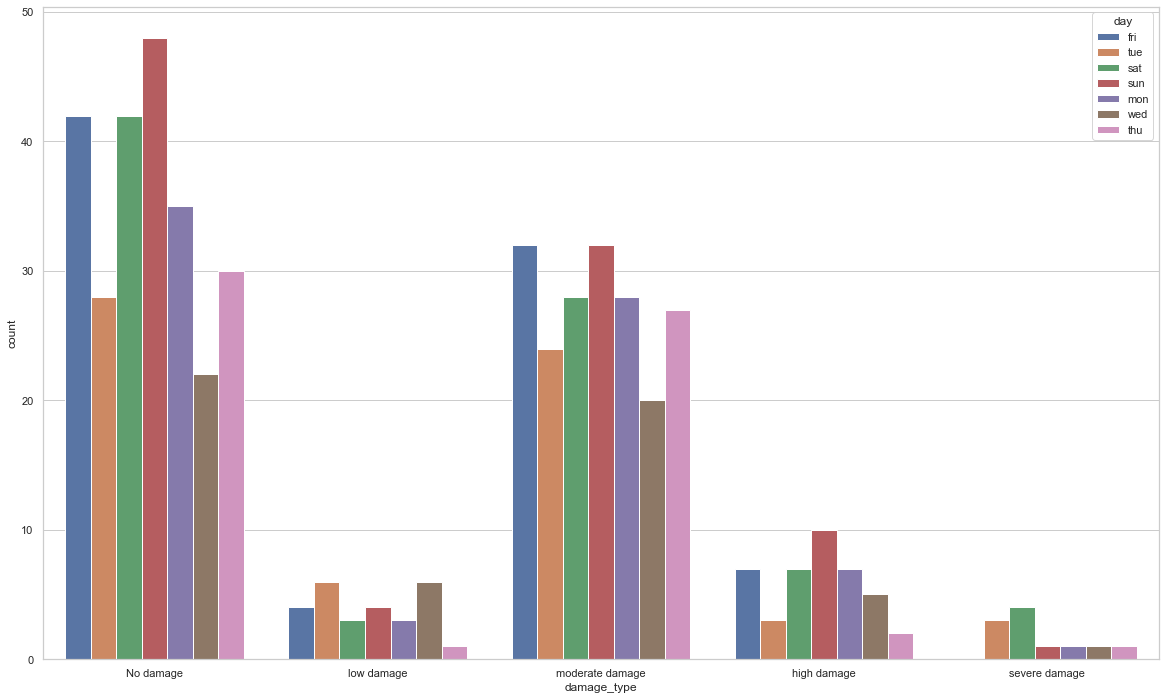

In [108]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

sns.countplot(x="damage_type", hue="day", data=f_data)

saturday and tuesday severe damage occur.
sunday and friday high damages occur.